In [2]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

In [5]:
t_a = pd.read_csv('twitter-archive-enhanced.csv')


In [6]:
t_a.sort_values('timestamp')
t_a.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
t_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [10]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

auth = tweepy.OAuthHandler('ysOhMbwzk2JcVz1SEgwbvsrIZ', 'uG2E6M0GY7MaN1iU1wI2BRyZn8LDdC9kPbGDJailTEgCyIClQr')
auth.set_access_token('2266897297-3rc0RsCOv92gUbofip5Ay5tgla9rU6Pxw0O0Krc', 'ylb6Msa88UcIE7IwbvPNmATN1yaEHNZoLzUgCtuXkaJrj')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [23]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in t_a['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 495
Rate limit reached. Sleeping for: 714
Rate limit reached. Sleeping for: 711


In [24]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2337
The list of tweets no found 19


In [25]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [26]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [27]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


In [29]:
t_a.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
tweet_json.head()


,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37489,8167,8108847,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32230,6045,8108847,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24283,4000,8108847,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40818,8321,8108847,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39032,9016,8108847,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [32]:
t_a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [33]:
# Check if there are any records in twitter_archive which are retweets
len(t_a[t_a.retweeted_status_id.isnull() == False])

181

In [34]:
# Check if there are any records in twitter_archive whose corresponding record with same tweet_id is missing in img_df table
len(t_a[~t_a.tweet_id.isin(image_prediction.tweet_id)])

281

In [15]:
# Sort by rating_denominator values
t_a.rating_denominator.value_counts().sort_index()


0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [35]:
t_a['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [36]:
t_a['text'].value_counts()

RT @dog_rates: Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k                                                               1
This is Theo. He can walk on water. Still coming to terms with it. 12/10 magical af https://t.co/8Kmuj6SFbC                                                    1
This is Swagger. He's the Cleveland Browns ambassador. Hype as h*ck after that first win today. 10/10 https://t.co/lXFM1l22bG                                  1
This sherk must've leapt out of the water and into the canoe, trapping the human. Won't even help paddle smh. 7/10 https://t.co/KubWEqOIgO                     1
Say hello to Bentley and Millie. They do everything together. Besties forever. Both 11/10 https://t.co/vU3tKr4vTn                                              1
Just got home from college. Dis my dog. She does all my homework. Big red turd in background. 13/10 no bias at all https://t.co/6WGFp9cuj6                     1
This is Dobby. I can't stop lookin

In [37]:
t_a['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [41]:
t_a['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [42]:
t_a['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [43]:
t_a['doggo'].value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [44]:
t_a['puppo'].value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

In [45]:
t_a['pupper'].value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [46]:
t_a['floofer'].value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [48]:
t_a.loc[t_a['name'].str.isupper()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [58]:
# Number of records whose both doggo and floofer columns are not None
len(t_a[(t_a.doggo != 'None') & (t_a.floofer != 'None')])

1

In [59]:
# Number of records whose both doggo and pupper columns are not None
len(t_a[(t_a.doggo != 'None') & (t_a.pupper != 'None')])

12

In [60]:
# Number of records whose both doggo and pupper columns are not None
len(t_a[(t_a.doggo != 'None') & (t_a.puppo != 'None')])

1

In [61]:
# Number of records whose both floofer and pupper columns are not None
len(t_a[(t_a.floofer != 'None') & (t_a.pupper != 'None')])

0

In [63]:
# Number of records whose both floofer and puppo columns are not None
len(t_a[(t_a.floofer != 'None') & (t_a.puppo != 'None')])

0

In [64]:
# Number of records whose both pupper and puppo columns are not None
len(t_a[(t_a.pupper != 'None') & (t_a.puppo != 'None')])

0

In [99]:
print(t_a.loc[t_a.rating_numerator == 204, 'text']) 
print(t_a.loc[t_a.rating_numerator == 143, 'text']) 
print(t_a.loc[t_a.rating_numerator == 666, 'text']) 
print(t_a.loc[t_a.rating_numerator == 1176, 'text'])
print(t_a.loc[t_a.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [100]:
#print whole text in order to verify numerators and denominators
print(t_a['text'][1120]) #17 dogs
print(t_a['text'][1634]) #13 dogs
print(t_a['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(t_a['text'][189]) #no picture, this will be ignored when cleaning data
print(t_a['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [101]:
with pd.option_context('max_colwidth', 200):
    display(t_a[t_a['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [102]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [103]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [104]:
image_prediction.img_num.value_counts()


1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [105]:
tweet_json.sample(10)


,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1496,691090071332753408,1766,352,8108893,12,Twitter for iPhone,Original tweet,https://t.co/MM7tb4HpEY
1783,676949632774234114,1337,414,8108894,12,Twitter for iPhone,Original tweet,https://t.co/HqM3YhCaaa
1873,674754018082705410,1370,460,8108894,12,Twitter for iPhone,Original tweet,https://t.co/9YmNcxA2Cc
2051,671122204919246848,3495,2546,8108895,12,Twitter for iPhone,Original tweet,https://t.co/WzVLdSHJU7
349,829501995190984704,33006,11286,8108865,12,Twitter for iPhone,Original tweet,https://t.co/hzjGiTmhgj
165,858843525470990336,15474,3497,8108847,12,Twitter for iPhone,Original tweet,https://t.co/A1s7QG7tqa
1796,676613908052996102,1099,203,8108894,12,Twitter for iPhone,Original tweet,https://t.co/vQ2Lw1BLBF
1514,690005060500217858,3788,1776,8108893,12,Twitter for iPhone,Original tweet,https://t.co/V8HcVIh4jt
630,793165685325201412,9953,2999,8108869,12,Twitter for iPhone,Original tweet,https://t.co/cXDCGTiL1x
1753,678278586130948096,11723,6340,8108894,12,Twitter for iPhone,Original tweet,https://t.co/JK8MByRzgj



## Quality
Completeness, validity, accuracy, consistency (content issues)

### twitter_archive(t_a)
1.Keep original ratings (no retweets) that have images
2.Delete columns that won't be used for analysis
3.Erroneous datatypes (doggo, floofer, pupper and puppo columns)
4.Separate timestamp into day - month - year (3 columns)
5.Correct numerators with decimals
6.Correct denominators other than 10:

    a. Manually (few examples assessed by individual print text).

    b. Programatically (Tweets with denominator not equal to 10 are usually multiple dogs).

### image_prediction
Drop 66 jpg_url duplicated
Create 1 column for image prediction and 1 column for confidence level
Delete columns that won't be used for analysis

### tweet_json
Keep original tweets only

### Tidiness
Change tweet_id to type int64 in order to merge with the other 2 tables
All tables should be part of one dataset

# Cleaning Data

In [106]:
twitter_archive_clean = t_a.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()


##### 1. Twitter archive - keep original ratings (no retweets) that have images.

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge twitter_archive and image_prediction, I will only keep the ones with images.

In [107]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


#### 2. Twitter archive - Delete columns that won't be used for analysis

In [108]:

#get the column names of twitter_archive_clean
print(list(twitter_archive_clean))

#CODE: Delete columns no needed
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [109]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### 3. Twitter_archive - Erroneous datatypes (doggo, floofer, pupper and puppo columns)

Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column. Then drop dogs. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.

In [110]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

#CODE: drop dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [111]:
#TEST
twitter_archive_clean['dogs_stage'].value_counts()


None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

#### 4. Twitter_archive - Separate timestamp into day - month - year (3 columns)

First convert timestamp to datetime. Then extract year, month and day to new columns. Finally drop timestamp column.

In [112]:
#CODE: convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [113]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

#### 5. Twitter_archive - Correc numerators

In [114]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


In [115]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


#### 6. Twitter_archive - Correc denominators

#### a. Manually
Five tweets with denominator not equal to 10 for special circunstances. Update both numerators and denominators when necessary. Delete other five tweets because they do not have actual ratings.

In [116]:

#CODE: Update both numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


#### b. Programatically
These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs

In [117]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

#TEST
twitter_archive_clean.sample()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
2834,771014301343748096,Another pic without a dog in it? What am I sup...,7.0,10.0,None,None,2016,8,31,7.0


#### 7. Image_prediction - Drop 66 jpg_url duplicated

In [118]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_prediction_clean['jpg_url'].duplicated()) 

0


#### 8. Image_prediction 

Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns.

In [119]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [120]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### 9. Image_prediction - Delete columns that won't be used for analysis

In [121]:
#CODE: print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

## 10. Tweet_json 

In [122]:
#CODE:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2171
Name: retweeted_status, dtype: int64

### 11. Tidiness 

In [123]:

#CODE: change tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#TEST
tweet_json_clean['tweet_id'].dtypes

#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
dogs_stage            1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [124]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 20 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
dogs_stage            1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
favorite_count        1621 non-null float64
retweet_count         1621 non-null float64
followers_count       1621 non-null float64
friends_count         1621 non-null float64
source                1621 non-null object
retweeted_status      1621 non-null object
url                   1621 non-null object
dtypes: float64(7), int64(4), 

## Save & Store New Clean Dataset

In [125]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

###  Analyzing & Visualizing Data

In [128]:
df_twitter['dog_type'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Staffordshire_bullterrier          20
Shih-Tzu                           20
Rottweiler                         19
beagle                             19
Maltese_dog                        19
Shetland_sheepdog                  19
Cardigan                           19
kuvasz                             18
Lakeland_terrier                   17
basset      

Q1. What is the repartition of the dog stages?

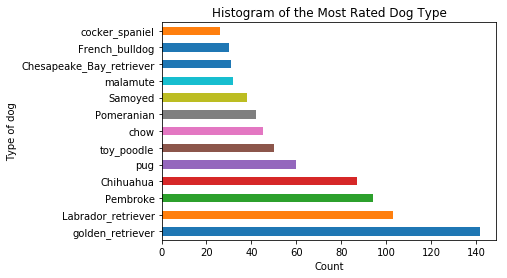

In [130]:

df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [135]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [136]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,2016.500000,6.00,16.000000,8.000000,11481.5000,3333.000000,8.108858e+06,12.0
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.75,15.916667,9.833333,4985.2500,1289.166667,8.108885e+06,12.0
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.25,15.000000,10.312500,8861.4375,2141.437500,8.108914e+06,12.0
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.50,18.500000,11.000000,6936.0000,1345.500000,8.108869e+06,12.0
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.50,7.000000,11.500000,10542.5000,2863.500000,8.108869e+06,12.0


###  Insight three & visualization
Dog_types with low number of ratings show a high variaty of mean ratings.



In [137]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [138]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.448276
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher                       11.000000
Eskimo_dog             

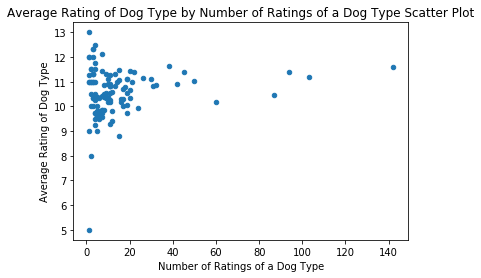

In [143]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');